In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
# Veri setini yükleyelim
df = pd.read_csv('netflix_titles.csv')

In [43]:
# Veri setinin ilk 5 satırını gösterelim
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [44]:
# Eksik verileri düşürelim
df = df.dropna()

In [45]:
# Türlerin sıklığını hesaplayalım
genre_counts = df['type'].value_counts()

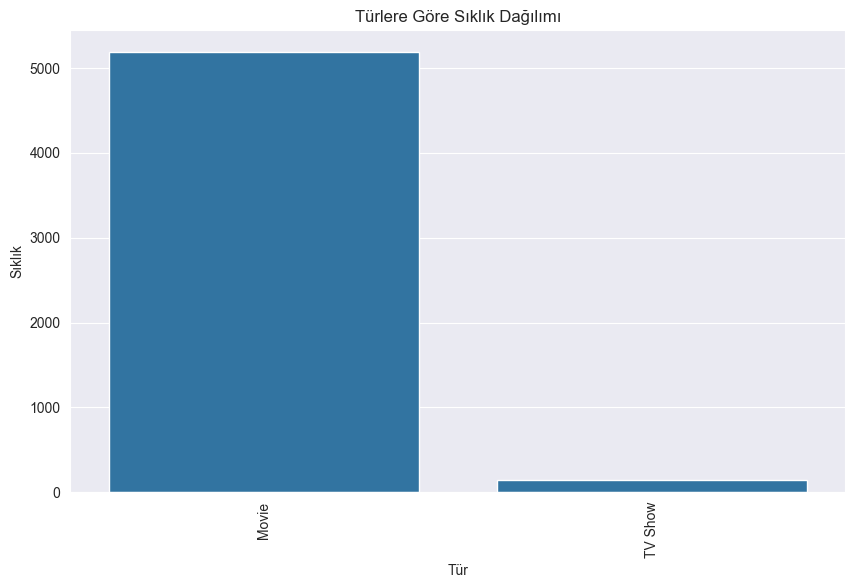

In [46]:
# Türlerin sıklıklarını görselleştirelim
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Türlere Göre Sıklık Dağılımı')
plt.xlabel('Tür')
plt.ylabel('Sıklık')
plt.xticks(rotation=90)
plt.show()

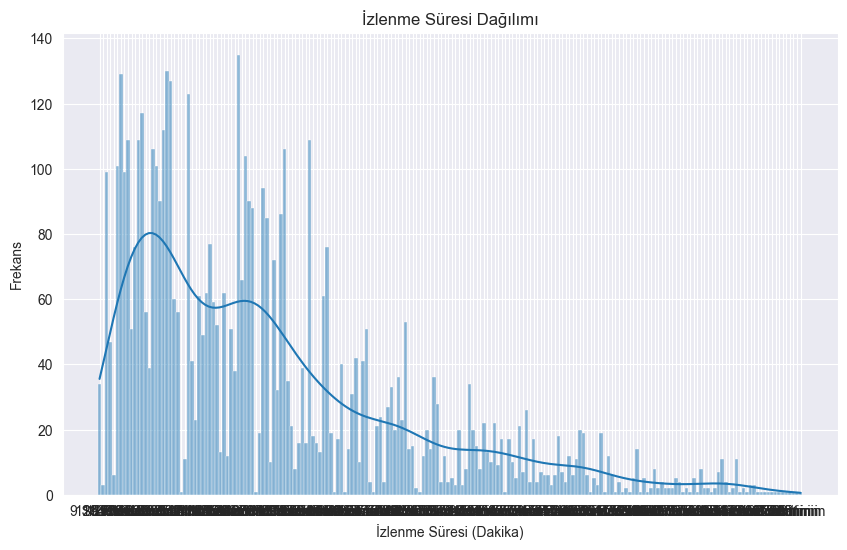

In [47]:
# İzlenme sürelerini görselleştirelim
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=30, kde=True)
plt.title('İzlenme Süresi Dağılımı')
plt.xlabel('İzlenme Süresi (Dakika)')
plt.ylabel('Frekans')
plt.show()


In [55]:
# Yıl bazında içerik sayısını inceleyelim
yearly_counts = df['release_year'].value_counts().sort_index()
print(yearly_counts)

release_year
1942      1
1944      1
1945      1
1946      1
1947      1
       ... 
2017    657
2018    648
2019    519
2020    442
2021    161
Name: count, Length: 72, dtype: int64


In [56]:
# 'duration' sütunundaki tüm değerleri string'e çeviriyoruz
df['duration'] = df['duration'].astype(str)

In [57]:
# 'duration' sütunundaki ' min' ve ' Seasons' gibi kelimeleri kaldırıp, sadece sayıyı alıyoruz
df['duration'] = df['duration'].str.extract('(\\d+)').astype(float)

In [59]:
# NaN değerleri temizleyebiliriz (örneğin, 'Seasons' içeren satırlar)
df = df.dropna(subset=['duration'])
print(df)

     show_id     type                          title             director  \
7         s8    Movie                        Sankofa         Haile Gerima   
8         s9  TV Show  The Great British Baking Show      Andy Devonshire   
9        s10    Movie                   The Starling       Theodore Melfi   
12       s13    Movie                   Je Suis Karl  Christian Schwochow   
24       s25    Movie                          Jeans           S. Shankar   
...      ...      ...                            ...                  ...   
8801   s8802    Movie                        Zinzana      Majid Al Ansari   
8802   s8803    Movie                         Zodiac        David Fincher   
8804   s8805    Movie                     Zombieland      Ruben Fleischer   
8805   s8806    Movie                           Zoom         Peter Hewitt   
8806   s8807    Movie                         Zubaan          Mozez Singh   

                                                   cast  \
7     Kofi Ghana

In [60]:
# Film ve dizileri ayıralım
film_data = df[df['type'] == 'Movie']
tv_data = df[df['type'] == 'TV Show']

print(film_data)
print(tv_data)

     show_id   type         title             director  \
7         s8  Movie       Sankofa         Haile Gerima   
9        s10  Movie  The Starling       Theodore Melfi   
12       s13  Movie  Je Suis Karl  Christian Schwochow   
24       s25  Movie         Jeans           S. Shankar   
27       s28  Movie     Grown Ups         Dennis Dugan   
...      ...    ...           ...                  ...   
8801   s8802  Movie       Zinzana      Majid Al Ansari   
8802   s8803  Movie        Zodiac        David Fincher   
8804   s8805  Movie    Zombieland      Ruben Fleischer   
8805   s8806  Movie          Zoom         Peter Hewitt   
8806   s8807  Movie        Zubaan          Mozez Singh   

                                                   cast  \
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24    Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   
27    Ad

In [61]:
# Ortalama izlenme süresi karşılaştırması
film_avg_duration = film_data['duration'].mean()
tv_avg_duration = tv_data['duration'].mean()

In [62]:
# Sonuçları yazdıralım
print(f"Film Ortalama Süre: {film_avg_duration} dakika")
print(f"Dizi Ortalama Süre: {tv_avg_duration} dakika")

Film Ortalama Süre: 102.70144648023144 dakika
Dizi Ortalama Süre: 1.9047619047619047 dakika
